In [51]:
import os
import torch
import re

def load_best_models(client_id, base_folder, distribution):
    client_folder = os.path.join(base_folder, f"{distribution}_client{client_id}")
    files = os.listdir(client_folder)

    def get_best_model(pattern):
        matches = [re.match(pattern, f) for f in files]
        best_file = min(
            (m for m in matches if m),
            key=lambda m: float(m.group(1)),
            default=None
        )
        
        print(os.path.join(client_folder, best_file.group(0)))
        return best_file.group(1)

    min_tvd = get_best_model(r"cond_generator_epoch\d+_tvd([\d.]+)\.pt")
    
    print(min_tvd)
    return min_tvd
    # critic_path = get_best_model(r"cond_critic_epoch\d+_tvd([\d.]+)\.pt")


    # return torch.load(gen_path, map_location=torch.device(self.device)) if gen_path else None, torch.load(critic_path, map_location=torch.device(self.device)) if critic_path else None
    # return torch.load(gen_path, map_location=torch.device(self.device)) if gen_path else None

In [70]:
distribution= 'P(X|Z)'


# base_folder1= ['no FL', './Fed_TGAN/save/NoFL_noDCM_256x5x1000']
# base_folder2= ['fedcm', './Fed_TGAN/save/FL_noDCM_256x5x1000']

# base_folder1= ['no FL', './Fed_TGAN/save/NoFL_noDCM_128x5x1000']
# base_folder2= ['fedcm', './Fed_TGAN/save/FL_noDCM_128x5x1000']

base_folder1= ['no FL', './Fed_TGAN/save/rNoFL_DCM_20x5x1000']
base_folder2= ['fedcm', './Fed_TGAN/save/rFL_DCM_20x5x1000']


result={}
for option in [base_folder1, base_folder2]:
    key, folder= option
    result[key]=[]
    for client_id in range(5):
        out= load_best_models(client_id, folder, distribution)
        result[key].append(out)
        

./Fed_TGAN/save/rNoFL_DCM_20x5x1000/P(X|Z)_client0/cond_generator_epoch57_tvd0.0782.pt
0.0782
./Fed_TGAN/save/rNoFL_DCM_20x5x1000/P(X|Z)_client1/cond_generator_epoch58_tvd0.0759.pt
0.0759
./Fed_TGAN/save/rNoFL_DCM_20x5x1000/P(X|Z)_client2/cond_generator_epoch88_tvd0.0754.pt
0.0754
./Fed_TGAN/save/rNoFL_DCM_20x5x1000/P(X|Z)_client3/cond_generator_epoch33_tvd0.0716.pt
0.0716
./Fed_TGAN/save/rNoFL_DCM_20x5x1000/P(X|Z)_client4/cond_generator_epoch94_tvd0.0712.pt
0.0712
./Fed_TGAN/save/rFL_DCM_20x5x1000/P(X|Z)_client0/cond_generator_epoch74_tvd0.0821.pt
0.0821
./Fed_TGAN/save/rFL_DCM_20x5x1000/P(X|Z)_client1/cond_generator_epoch77_tvd0.0804.pt
0.0804
./Fed_TGAN/save/rFL_DCM_20x5x1000/P(X|Z)_client2/cond_generator_epoch80_tvd0.0599.pt
0.0599
./Fed_TGAN/save/rFL_DCM_20x5x1000/P(X|Z)_client3/cond_generator_epoch53_tvd0.0858.pt
0.0858
./Fed_TGAN/save/rFL_DCM_20x5x1000/P(X|Z)_client4/cond_generator_epoch72_tvd0.0756.pt
0.0756


In [71]:
result

{'no FL': ['0.0782', '0.0759', '0.0754', '0.0716', '0.0712'],
 'fedcm': ['0.0821', '0.0804', '0.0599', '0.0858', '0.0756']}

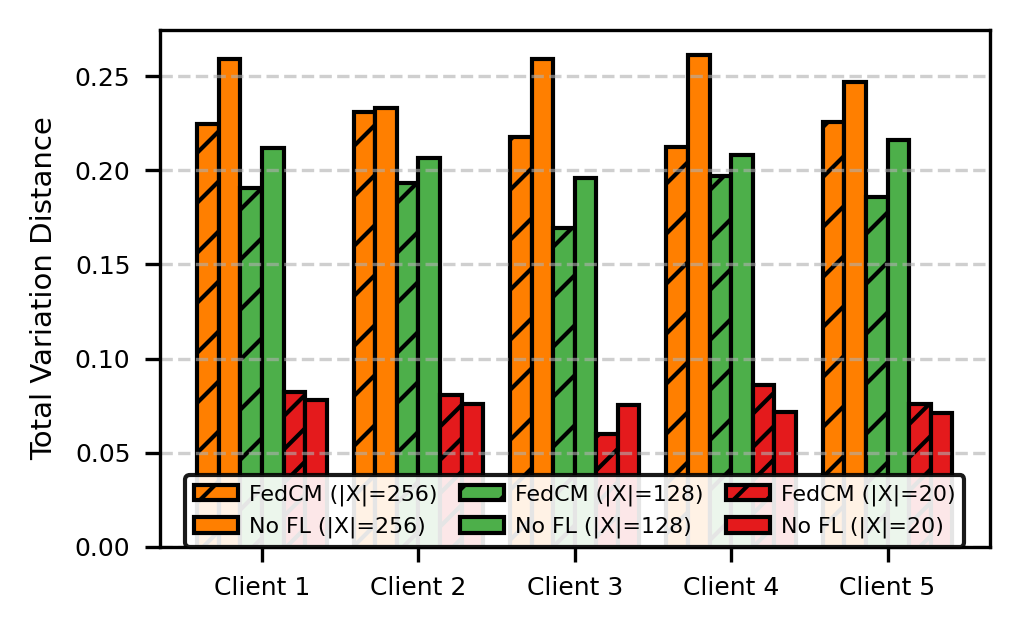

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


# Data
clients = np.arange(1, 6)  # Client indices
no_FL_256 = [0.2590, 0.2331, 0.2593, 0.2614, 0.2470]
fedcm_256 = [0.2246, 0.2308, 0.2174, 0.2121, 0.2258]
no_FL_128 = [0.2117, 0.2066, 0.1961, 0.2082, 0.2162]
fedcm_128 = [0.1908, 0.1934, 0.1693, 0.1970, 0.1858]
no_FL_20 = [0.0782, 0.0759, 0.0754, 0.0716, 0.0712]
fedcm_20 = [0.0821, 0.0804, 0.0599, 0.0858, 0.0756]

# Bar width and spacing
bar_width = 0.12  # Slightly smaller bars
client_spacing = 0.15  # Space between client groups

# Define colors (stronger and readable)
# colors = ['#377eb8', '#4daf4a', '#e41a1c', '#ff7f00', '#984ea3', '#f781bf']
colors = ['#ff7f00', '#ff7f00', '#4daf4a', '#4daf4a', '#e41a1c', '#e41a1c']



hatches = [ '//',None,  '//', None,  '///', None]  # Hatching pattern for differentiation

# Create a **compact** figure for one-column layout
plt.figure(figsize=(3.5, 2.2), dpi=300)

# Adjust client positions to create space between clients
positions = clients * (bar_width * 6 + client_spacing)

# Bar plot with **no spacing between dimensions**, only between clients
plt.bar(positions - 2.5 * bar_width, fedcm_256 , bar_width, color=colors[0], edgecolor='black', hatch=hatches[0],  label='No FL (X=256)')
plt.bar(positions - 1.5 * bar_width, no_FL_256, bar_width, color=colors[1], edgecolor='black', hatch=hatches[1], label='FedCM (X=256)')
plt.bar(positions - 0.5 * bar_width, fedcm_128 , bar_width, color=colors[2], edgecolor='black', hatch=hatches[2], label='No FL (X=128)')
plt.bar(positions + 0.5 * bar_width, no_FL_128, bar_width, color=colors[3], edgecolor='black', hatch=hatches[3], label='FedCM (X=128)')
plt.bar(positions + 1.5 * bar_width, fedcm_20 , bar_width, color=colors[4], edgecolor='black', hatch=hatches[4], label='No FL (X=20)')
plt.bar(positions + 2.5 * bar_width, no_FL_20, bar_width, color=colors[5], edgecolor='black', hatch=hatches[5], label='FedCM (X=20)')

# Labels and title with **smaller font for single-column paper**
# plt.xlabel('Client Index', fontsize=9, fontweight='bold')
plt.ylabel('Total Variation Distance', fontsize=7)
# plt.title('TVD Across 5 Clients for $P(X|Z)$ w/ 1000 training samples', fontsize=6)

# Improve x-axis readability for a **narrow space**
plt.xticks(positions, labels=[f'Client {i}' for i in clients], fontsize=6, rotation=0)
plt.yticks(fontsize=6)

# Add **light grid lines**
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Create **two-column legend** grouped by dimension
legend_labels = [
     ('FedCM (|X|=256)', colors[1]), ('No FL (|X|=256)', colors[0]),
    ('FedCM (|X|=128)', colors[3]), ('No FL (|X|=128)', colors[2]), 
    ('FedCM (|X|=20)', colors[5]) , ('No FL (|X|=20)', colors[4])
]

# Separate labels and handles
# handles = [plt.Rectangle((0,0),1,1, color=color, edgecolor='black') for _, color in legend_labels]
handles = [
    mpatches.Patch(facecolor=color, edgecolor='black', hatch=hatches[i], label=label)
    for i, (label, color) in enumerate(legend_labels)
]

labels = [label for label, _ in legend_labels]

# Adjust legend placement and format
plt.legend(handles, labels, fontsize=5.3, loc='upper center', bbox_to_anchor=(0.5, 0.16), 
           frameon=True, edgecolor='black', facecolor='white', framealpha=0.9,  ncol=3, columnspacing=1.0, handletextpad=0.5)


# **Tight layout to fit well in a single-column format**
plt.tight_layout()

# Save for LaTeX use
plt.savefig("Figures/cond_model.pdf", dpi=300, bbox_inches='tight')

# Show plot
plt.show()
